## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

Import neccessary libraries

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Internship\Car Price Prediction\car_price_prediction.csv")
data.head(5)

,Unnamed: 0,Brand,Model,Manufactured_year,Running_kms,No_of_owner,Fuel_type,Variant,Price,Location
0,0,Maruti,Swift,2012,"1,29,639 km",1st Owner,Diesel,VDI Manual,"₹2,97,999",New Delhi
1,1,Maruti,Swift,2013,"76,795 km",1st Owner,Diesel,VDI BS IV Manual,"₹3,61,399",New Delhi
2,2,Maruti,Swift,2013,"66,341 km",1st Owner,Diesel,VDI BS IV Manual,"₹3,67,999",New Delhi
3,3,Maruti,Alto,2014,"40,562 km",1st Owner,Petrol,VXI Manual,"₹2,92,499",New Delhi
4,4,Maruti,Swift,2014,"56,467 km",1st Owner,Diesel,LDI BS IV Manual,"₹3,58,199",New Delhi


Import and Visualise the data

Here various brands, models, manufactured year, fuel type of used cars are taken. Using the above data, we have to predict the price of a used car.

Target
- Price

Labels
- Brand
- Model
- Manufactured_year
- Running_kms
- No_of_owner
- Fuel_type
- Variant
- Location

Remove Unnamed: 0, because this column does not have any use for finding the target

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)

Dropped the column which does not give any clue to analysis

In [4]:
data.nunique().sort_values()

Fuel_type               3
No_of_owner             4
Location                7
Manufactured_year      14
Brand                  21
Model                 102
Variant               588
Price                2497
Running_kms          3372
dtype: int64

- Running kms, price, variant have various unique values
- Consider Fuel_type, No_of_owner, Location, brand and Manufactured_year as categorical variable

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              6332 non-null   object
 1   Model              6332 non-null   object
 2   Manufactured_year  6332 non-null   int64 
 3   Running_kms        6332 non-null   object
 4   No_of_owner        6332 non-null   object
 5   Fuel_type          6332 non-null   object
 6   Variant            6332 non-null   object
 7   Price              6332 non-null   object
 8   Location           6332 non-null   object
dtypes: int64(1), object(8)
memory usage: 445.3+ KB


- Only manufacturing year is in integer form, Price and Running_kms columns have symbol
- Other columns are having object type data which has to be encoded

In [6]:
data.shape

(6332, 9)

Shape of the data set has 6332 rows and 10 columns

## EDA and Data Preprocessing

In [7]:
data.Price= data.Price.str.replace('₹',' ',regex=True)
data.Price= data.Price.str.replace(',','',regex=True)
data.Running_kms= data.Running_kms.str.replace(',','',regex=True)
data.Running_kms= data.Running_kms.str.replace('km','',regex=True)

Replaced all the special characters. Still it will show as object type

In [8]:
data["Price"] = data["Price"].astype(str).astype(int)
data["Running_kms"] = data["Running_kms"].astype(str).astype(int)

Converted the object type data for Price and Running_kms as integers

In [9]:
data.isnull().sum()

Brand                0
Model                0
Manufactured_year    0
Running_kms          0
No_of_owner          0
Fuel_type            0
Variant              0
Price                0
Location             0
dtype: int64

There is Null values present in the dataset

In [10]:
data.columns

Index(['Brand', 'Model', 'Manufactured_year', 'Running_kms', 'No_of_owner',
       'Fuel_type', 'Variant', 'Price', 'Location'],
      dtype='object')

There are 8 labels and 1 target column

In [11]:
counter = 0
r,c = data.shape

data = data.copy()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)

if data.shape==(r,c):
    print('\n The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dropped {r-data.shape[0]}')

Number of duplicates dropped 1171


There are duplicates present in the dats which is removed

<function matplotlib.pyplot.show(close=None, block=None)>

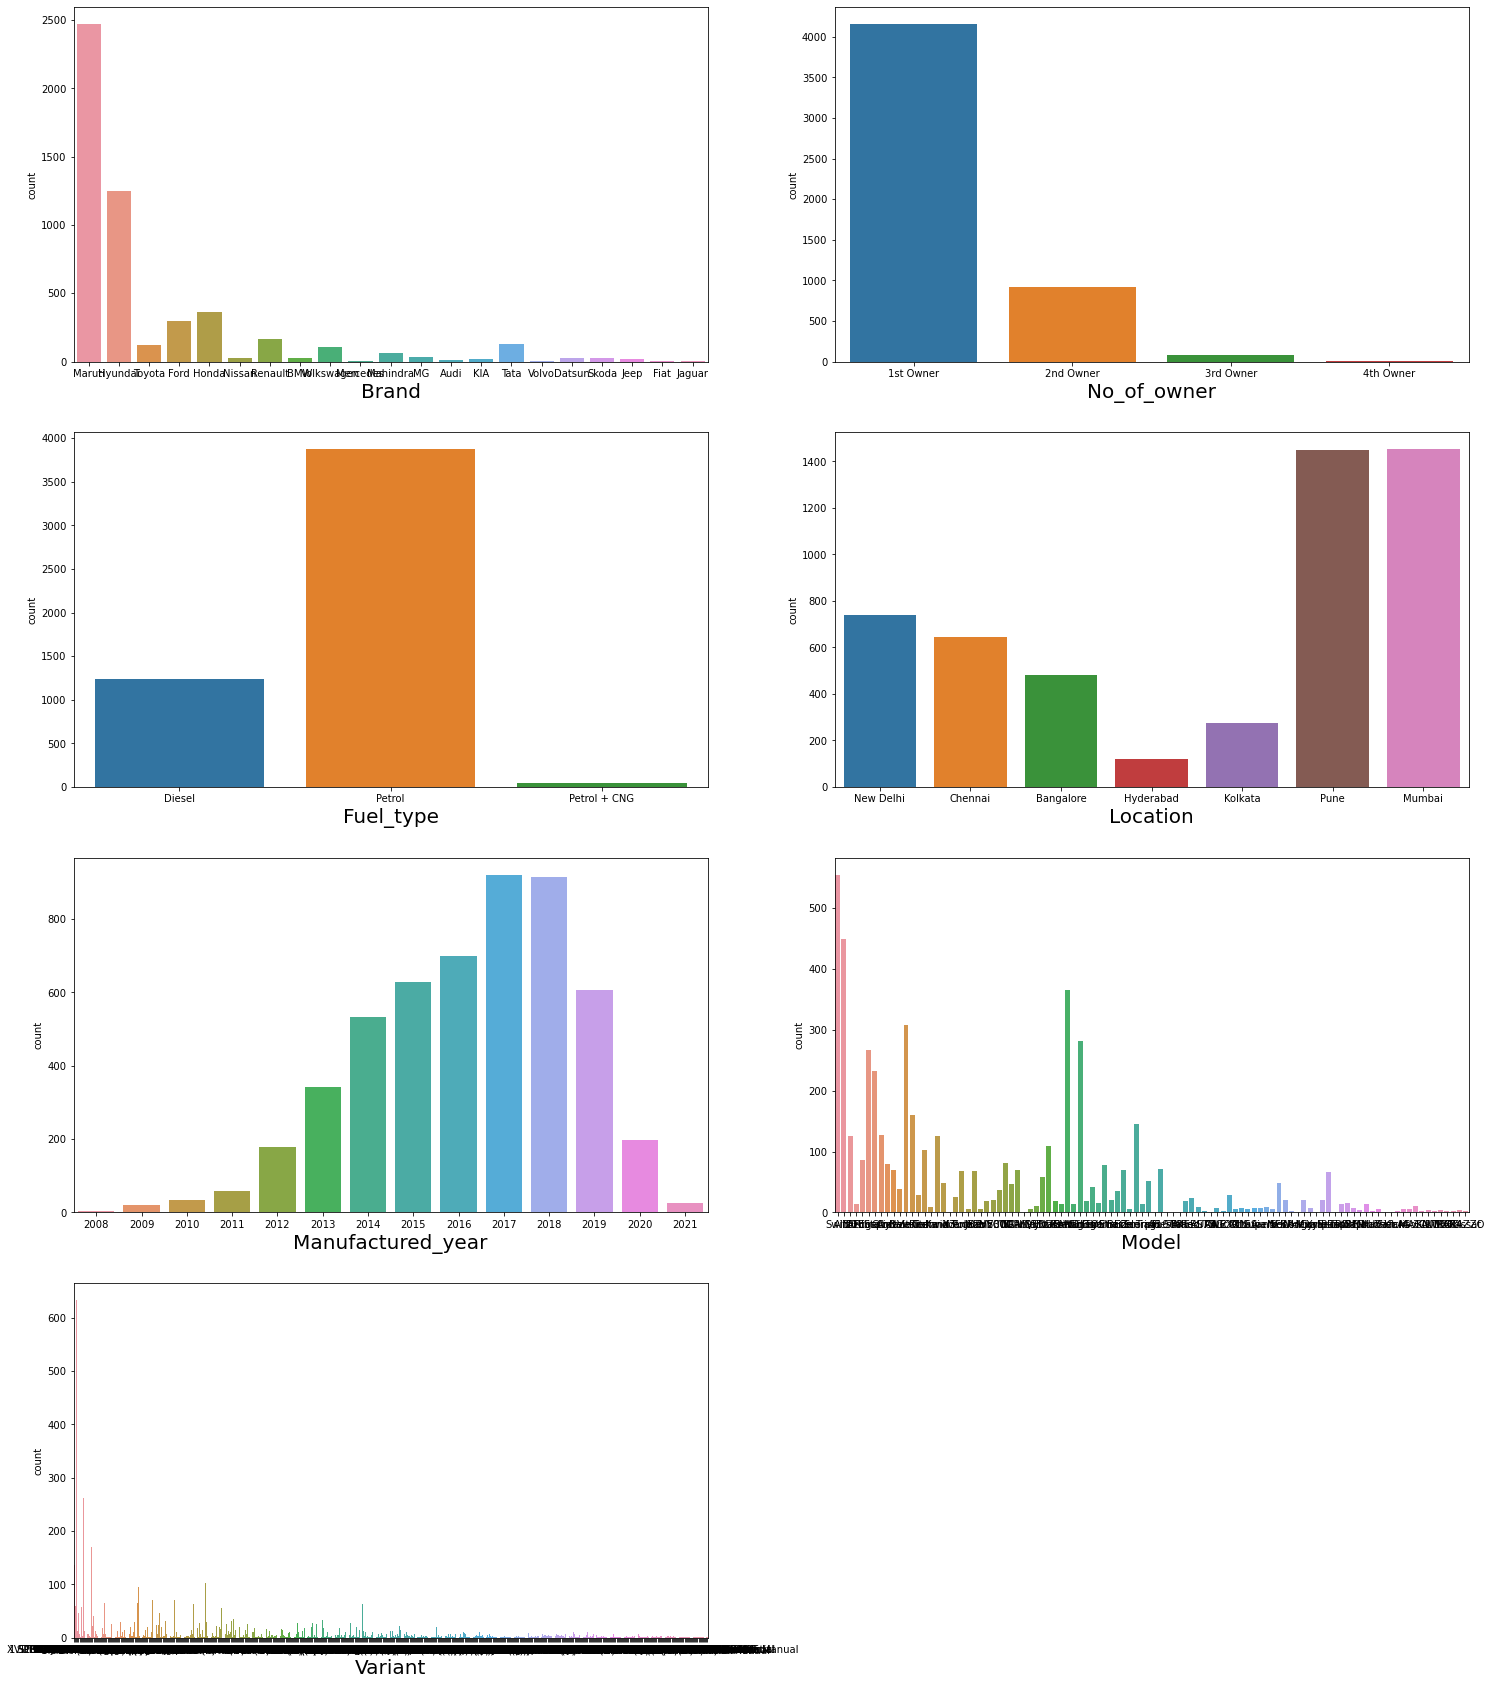

In [12]:
class_data = data[['Brand','No_of_owner','Fuel_type','Location','Manufactured_year','Model','Variant']]

plt.figure(figsize = (25,30), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <= 8:
        ax =  plt.subplot(4,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Maruti brand has the highest no. of cars listed with Hyundai the next
- 1st owner cars are more compared to the others
- Petrol fuel type has the more number of cars with Diesel ranking second
- Mumbai has the most number of cars and Pune the next with others having average of 800
- 2017 and 2018 are having equal number of manufactured years with others being low
- Model and variant has an imbalanced data

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

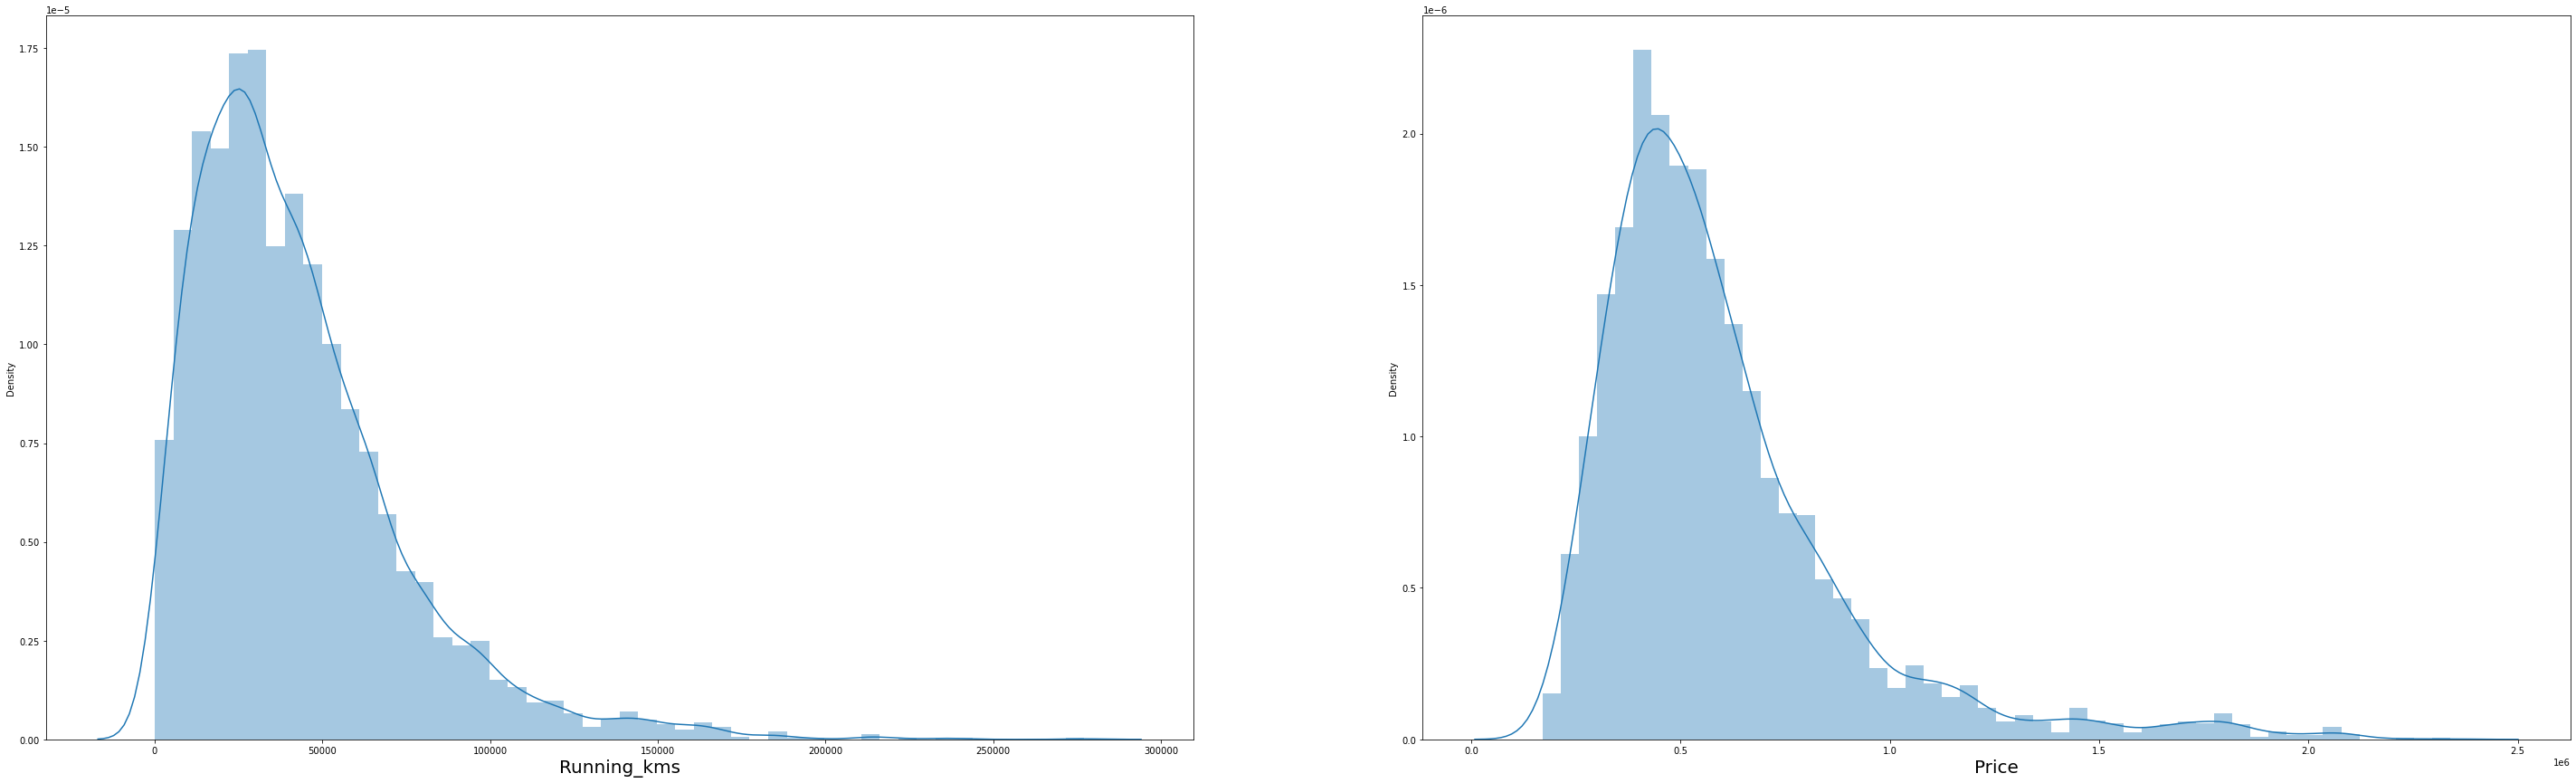

In [13]:
cont_data = data.drop(['Brand','No_of_owner','Fuel_type','Location','Manufactured_year','Model','Variant'],axis=1)

plt.figure(figsize = (50,50), facecolor = 'white')
plotnumber = 1

for column in cont_data:
    if plotnumber <= 6:
        ax =  plt.subplot(3,2,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Running_kms and Price is a standardised continuous data
- Outliers is also present which has to be removed

In [14]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

,Brand,Model,Manufactured_year,Running_kms,No_of_owner,Fuel_type,Variant,Price,Location
0,12.0,75.0,2012,129639,0.0,0.0,457.0,297999,5.0
1,12.0,75.0,2013,76795,0.0,0.0,456.0,361399,5.0
2,12.0,75.0,2013,66341,0.0,0.0,456.0,367999,5.0
3,12.0,8.0,2014,40562,0.0,1.0,486.0,292499,5.0
4,12.0,75.0,2014,56467,0.0,0.0,301.0,358199,5.0
...,...,...,...,...,...,...,...,...,...
5156,12.0,19.0,2015,40767,0.0,1.0,580.0,581699,4.0
5157,12.0,57.0,2020,20611,0.0,2.0,311.0,609899,4.0
5158,6.0,24.0,2019,61173,1.0,0.0,72.0,994999,4.0
5159,12.0,12.0,2017,18456,0.0,1.0,183.0,688399,4.0


The data is encoded using ordinal encoder

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

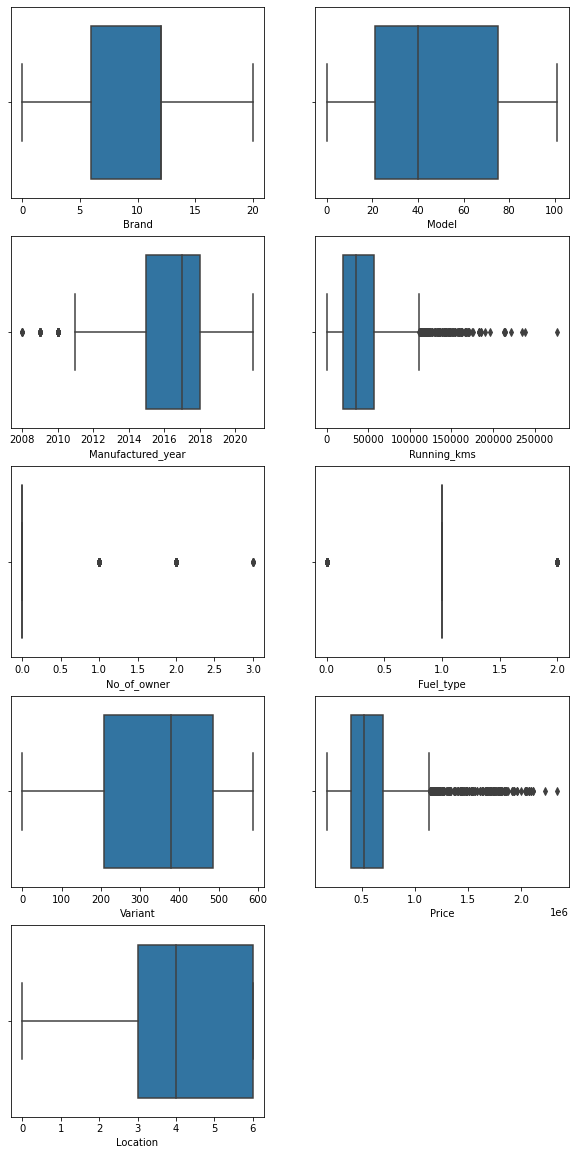

In [15]:
plt.figure(figsize=(10,50))
graph = 1
for column in data:
    if graph<= 24:
        ax = plt.subplot(12,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

- Manufactured year, running kms, No. of owner, fuel type and price has outliers

In [16]:
z = np.abs(zscore(data))
data_new = data[(z<3).all(axis=1)]
print('Before removing outlier', data.shape)
print('After removing outlier', data_new.shape)

Before removing outlier (5161, 9)
After removing outlier (4839, 9)


Keeping maximum threshold as 3, outliers are removed

In [17]:
Data_loss = ((5161-4839)/5161)*100
Data_loss

6.239100949428406

The Data loss is about 6%

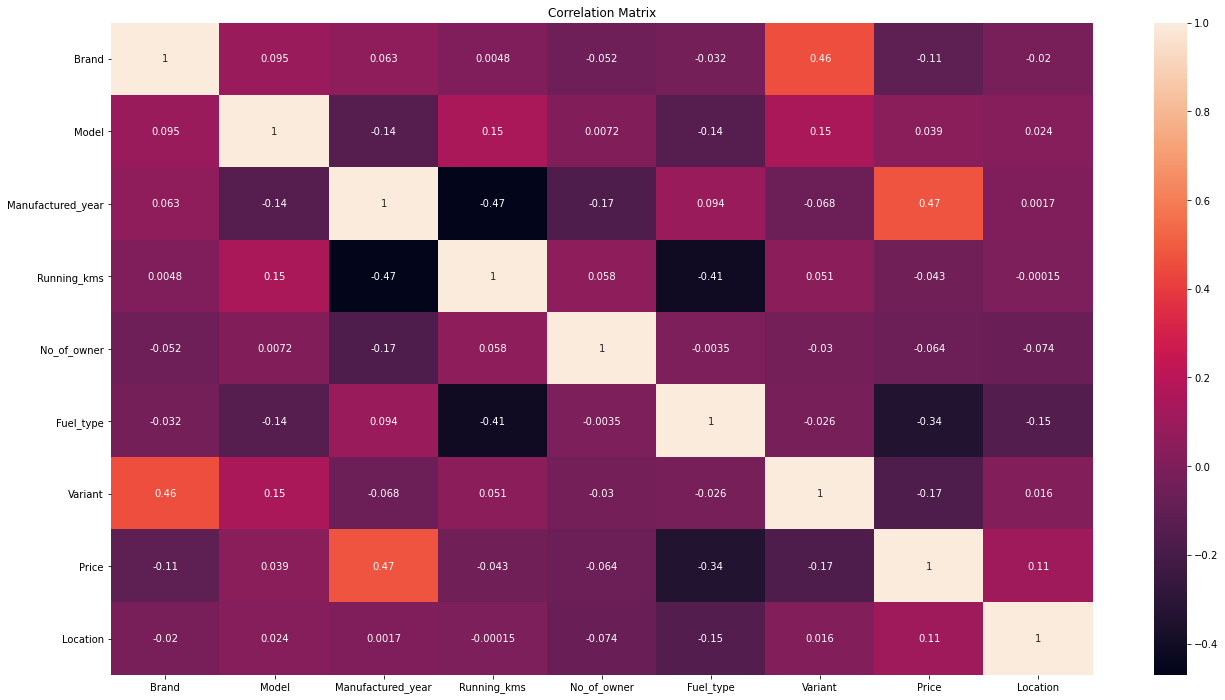

In [18]:
corr_mat = data_new.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

There is no correlation between variables

## Data Manipulation

In [19]:
x = data_new.drop('Price',axis=1)
y = data_new['Price']

Separated the labels and target

In [20]:
x.skew().sort_values(ascending=False)

No_of_owner          1.677387
Running_kms          0.938011
Model                0.310094
Brand                0.030316
Manufactured_year   -0.417502
Variant             -0.451290
Location            -0.685362
Fuel_type           -1.023511
dtype: float64

There is a no skewness in the data, need not treat it

In [21]:
x_scaled = scaler.fit_transform(x)

Since there is different range of data, scale the data using Standard Scalar

## Feature Selection

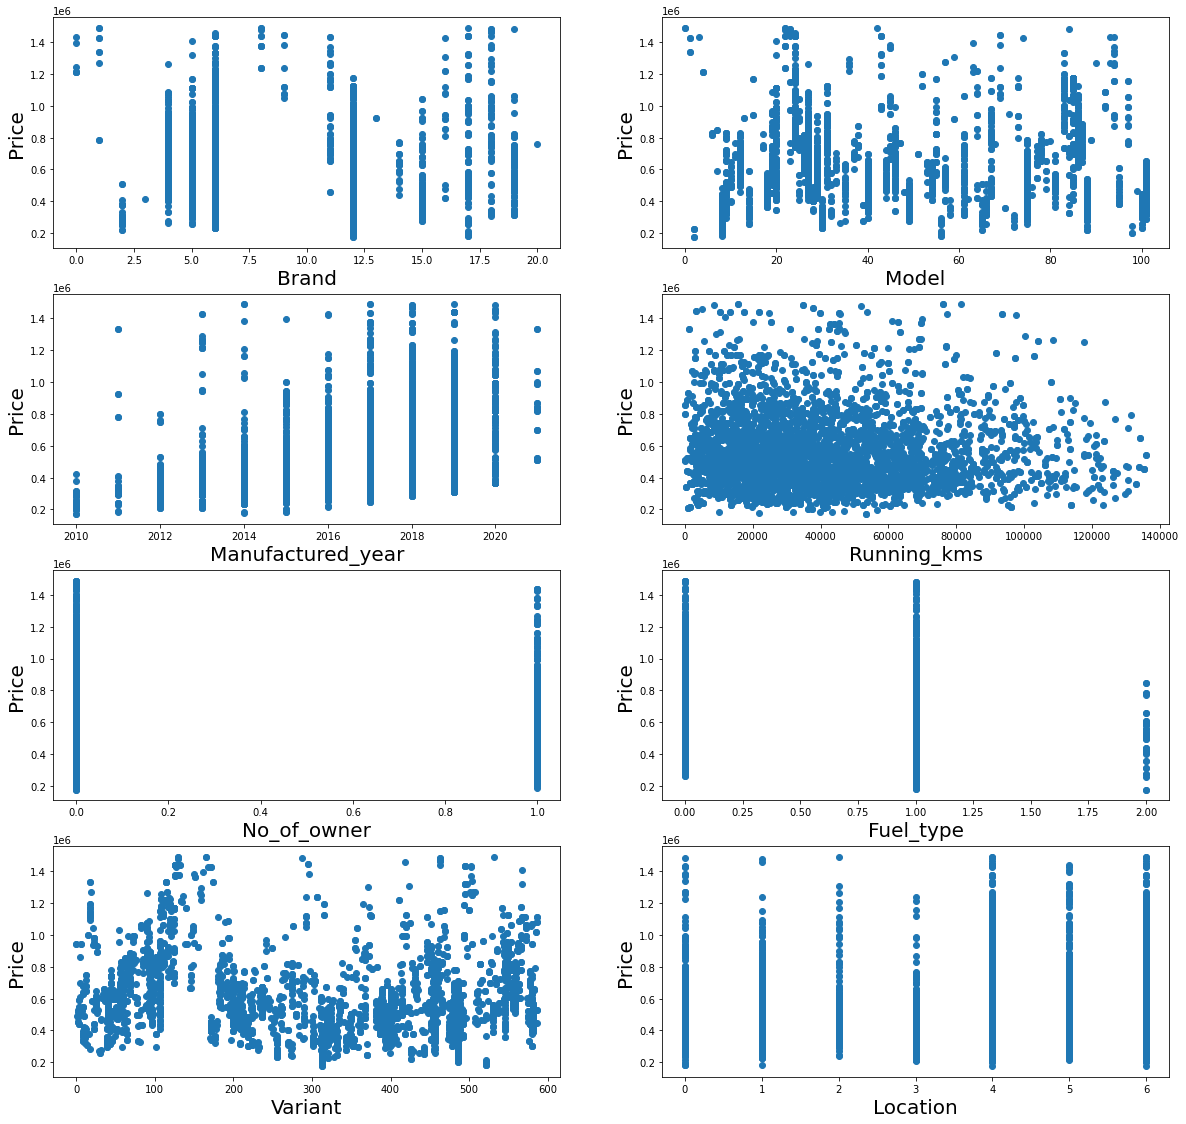

In [22]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=20:
        ax = plt.subplot(10,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Price', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship between the labels and target looks fairly linear

In [23]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor (x_scaled,i)for i in range (x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.284674,Brand
1,1.063112,Model
2,1.367014,Manufactured_year
3,1.564243,Running_kms
4,1.038360,No_of_owner
5,1.265985,Fuel_type
6,1.296787,Variant
7,1.036573,Location


There is no collinearity found.

## Model Building

In [24]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.4672655060260118 on Random State 204


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 204)

### Linear Regression

In [26]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.4672655060260118
Mean Absolute Error: 131185.60251719784
Mean Squared Error: 32594055549.971745


### Decision Tree Regressor

In [27]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.8949804267906982
Mean Absolute Error: 31986.77685950413
Mean Squared Error: 6425365433.884297


### Random Forest Regressor

In [28]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9370342407569667
Mean Absolute Error: 30883.353026859506
Mean Squared Error: 3852405800.1278596


### KNeighborsRegressor

In [29]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_ = knn.score(x_test,y_test)
print('Regression Score:',knn_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)


Regression Score: 0.11820379775066403
Mean Absolute Error: 30883.353026859506
Mean Squared Error: 3852405800.1278596


### SVR

In [30]:
sv = SVR()
sv.fit(x_train,y_train)
sv_ = sv.score(x_test,y_test)
print('Regression Score:',sv_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)
SVR

Regression Score: -0.05574812179155009
Mean Absolute Error: 30883.353026859506
Mean Squared Error: 3852405800.1278596


sklearn.svm._classes.SVR

Random Forest Regressor has 93% regression score

Regression score
- Linear Regression       - 0.46
- Decision tree           - 0.89
- Random Forest Regressor - 0.93
- KNeighbors Regressor    - 0.11
- SVR                     - -0.05

## Cross Validation

In [31]:
sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

sc3 = cross_val_score(knn,x,y,cv=5)
print('KNN cvs:',sc3.mean())

sc4 = cross_val_score(sv,x,y,cv=5)
print('SVR cvs:',sc4.mean())

LR cvs: 0.34519933785336987
DT cvs: 0.8358254011395004
RFR cvs: 0.8994452113441517
KNN cvs: 0.008676305231693692
SVR cvs: -0.08443246519577019


Accuracy Score Cross-Validation Score
- Linear Regression        - 0.46         - 0.34
- Decision tree            - 0.89         - 0.83
- Random Forest Regressor  - 0.93         - 0.90
- KNeighbors Regressor     - 0.11         - 0.01
- SVR                      - -0.05        - -0.08

Random Forest regressor has regression score of 0.93 and the cross-validation score is 0.90. So, Random Forest Regressor is selected as the best fitting model

### Hyper parameter Tuning

In [32]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45],'loss' : ['exponential'],'random_state' : [204]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'loss': ['exponential'],
                                        'n_estimators': [40, 47, 49, 50],
                                        'random_state': [204]})
Best Estimator: AdaBoostRegressor(learning_rate=0.45, loss='exponential', random_state=204)


In [33]:
ada = AdaBoostRegressor(loss='exponential',learning_rate=0.4,n_estimators=49,random_state=204)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.5912743247263765


Accuracy post tuning is low compared to the random forest regression score. So, use the random forest regressor for prediction of car price